<a href="https://colab.research.google.com/github/jack-kennedy56/jack-kennedy56/blob/main/Credit_Card_Fraud_Dect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler
import collections
import plotly.express as px
import plotly.graph_objects as go
import itertools
from sklearn.preprocessing import RobustScaler
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold
from xgboost import XGBRegressor,XGBClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold



import xgboost as xgb
import scikitplot as skplt

%matplotlib inline

In [ ]:
df = pd.read_csv("creditcard.csv")

In [ ]:
df.shape

(284807, 31)

In [ ]:
df = df.sample(frac=.40)

In [ ]:
df.shape

(113923, 31)

In [ ]:
#print what percentage of imbalance in fraud
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.82 % of the dataset
Frauds 0.18 % of the dataset


In [ ]:
#imbalance in the data
fraud = df[df['Class'] == 1] 
valid = df[df['Class'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print(outlierFraction) 
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0]))) 

0.0018027049367734219
Fraud Cases: 205
Valid Transactions: 113718


In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1,1))

In [ ]:
df.drop(['Time', 'Amount'], axis=1, inplace=True)
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(0, 'scaled_time', scaled_time)
df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
207147,0.606979,-0.166505,-1.149908,1.588097,0.448899,-1.057643,0.307357,0.310040,-0.431568,-3.237703,...,-0.542320,2.679349,-1.743775,0.281337,-0.909653,-0.040987,-0.210292,0.271157,-0.095355,0
126456,-0.078690,-0.291383,1.180924,-0.371413,1.023780,-0.700682,-1.161341,-0.535840,-0.627656,0.071298,...,-0.153179,0.039372,0.407713,0.031331,0.430562,0.391750,-0.677858,0.112077,0.035686,0
70112,-0.363318,2.995699,-8.639861,-7.230895,0.628405,1.577939,2.483319,-1.974031,1.021502,-2.678088,...,-6.929628,-1.734174,0.801580,3.488946,0.627638,1.370061,0.602821,1.168051,-0.640708,0
222081,0.680455,0.246982,1.770190,0.126878,-0.211411,3.910886,0.202859,1.031399,-0.328241,0.257418,...,-0.182040,0.142627,0.602677,0.068658,0.787639,0.087737,0.077220,-0.009434,-0.041297,0
227542,0.707470,-0.070765,-0.859026,-0.121156,1.036822,-2.452687,0.614687,-0.936433,0.394899,-0.074166,...,0.159394,0.506440,1.152649,-0.611726,-0.288577,1.086490,0.116335,-0.049833,0.024168,0


In [ ]:
X = df.drop(["Class"], axis= 1)
Y = df["Class"]
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (79746, 30)
Shape of X_test:  (34177, 30)


In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2)
X_train_ros, Y_train_ros = ros.fit_resample(X_train, Y_train)

print("Shape of x_train_ros: ", X_train_ros.shape)
print("Shape of x_test: ", X_test.shape)
print()
print("RandomOverSampler, counts of label '1', %: {:.1f}".format(sum(Y_train_ros==1)/len(Y_train_ros)*100.0,2))
print("RandomOverSampler, counts of label '0', %: {:.1f}".format(sum(Y_train_ros==0)/len(Y_train_ros)*100.0,2))

Shape of x_train_ros:  (159214, 30)
Shape of x_test:  (34177, 30)

RandomOverSampler, counts of label '1', %: 50.0
RandomOverSampler, counts of label '0', %: 50.0


In [ ]:
X_train_ros = X_train_ros.sample(frac=.75)
Y_train_ros = Y_train_ros.sample(frac=.75)

XGBoost

In [ ]:
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred

In [ ]:
def PrintStats(cmat, y_test, pred):
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]

In [ ]:
xg = xgb.XGBClassifier() 
cmat, pred = RunModel(xg, X_train_ros, Y_train_ros, X_test, Y_test)
PrintStats(cmat, Y_test, pred)

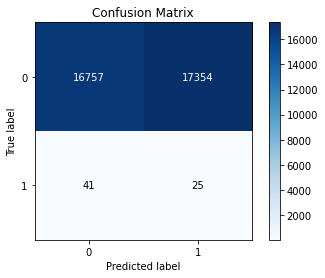

In [ ]:
#print confusion matrix for XGBoost
skplt.metrics.plot_confusion_matrix(Y_test, pred)

In [ ]:
#print accuracy of XGBoost
accuracy_score(Y_test, pred)

0.49103198057172953

In [ ]:
#print classification report for XGBoost
print (classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.49      0.66     34111
           1       0.00      0.38      0.00        66

    accuracy                           0.49     34177
   macro avg       0.50      0.44      0.33     34177
weighted avg       1.00      0.49      0.66     34177



In [ ]:
params={
 "learning_rate"    : [0.05, 0.1, 0.2, 0.3, 1 ] ,
 "max_depth"        : [10, 12, 15],
 "min_child_weight" : [ 1, 3 ],
 "gamma"            : [ 0.0, 0.15, 0.3]
    
}

In [ ]:
random_search= RandomizedSearchCV(estimator = xg_undersampled,param_distributions=params,n_iter=10,scoring='f1',n_jobs=-1,cv=5)

In [ ]:
random_search.fit(X_train_ros,Y_train_ros.ravel())

RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'gamma': [0.0, 0.15, 0.3],
                                        'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          1],
                                        'max_depth': [10, 12, 15],
                                        'min_child_weight': [1, 3]},
                   scoring='f1')

In [ ]:
random_search.best_estimator_

XGBClassifier(gamma=0.15, learning_rate=0.3, max_depth=12)

In [ ]:
random_search.best_params_

{'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.3, 'gamma': 0.15}

In [ ]:
xg_tuned = xgb.XGBClassifier(gamma=0.15, learning_rate=1, max_depth=20, min_child_weight=3) 
cmat, pred_tuned = RunModel(xg_tuned, X_train_ros, Y_train_ros, X_test, Y_test)
PrintStats(cmat, Y_test, pred_tuned)

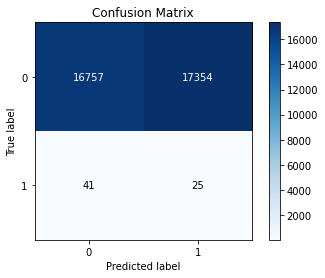

In [ ]:
#print confusion matrix for XGBoost tuned
skplt.metrics.plot_confusion_matrix(Y_test, pred)

In [ ]:
#print accuracy of XGBoost tuned
accuracy_score(Y_test, pred_tuned)

0.49685460982532115

In [ ]:
XGB_accuracy_score  = accuracy_score(Y_test,pred_tuned)
XGB_precison_score  = precision_score(Y_test,pred_tuned)
XGB_recall_score    = recall_score(Y_test,pred_tuned)
XGB_f1_score        = f1_score(Y_test,pred_tuned)
XGB_MCC             = matthews_corrcoef(Y_test,pred_tuned)

In [ ]:
print("")
print("XGBoost")
print("Scores")
print("Accuracy -->",XGB_accuracy_score)
print("Precison -->",XGB_precison_score)
print("Recall -->",XGB_recall_score)
print("F1 -->",XGB_f1_score)
print("MCC -->",XGB_MCC)
print(classification_report(Y_test,pred_tuned))


XGBoost
Scores
Accuracy --> 0.49685460982532115
Precison --> 0.0015712290502793297
Recall --> 0.4090909090909091
F1 --> 0.003130434782608696
MCC --> -0.008243596378424626
              precision    recall  f1-score   support

           0       1.00      0.50      0.66     34111
           1       0.00      0.41      0.00        66

    accuracy                           0.50     34177
   macro avg       0.50      0.45      0.33     34177
weighted avg       1.00      0.50      0.66     34177



KNN

In [ ]:
#setup beofre creating knn classifier 
neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    #Setup a knn classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    
    #Fit the model
    knn.fit(X_train_ros,Y_train_ros.ravel())
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_ros, Y_train_ros.ravel())
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, Y_test.ravel()) 


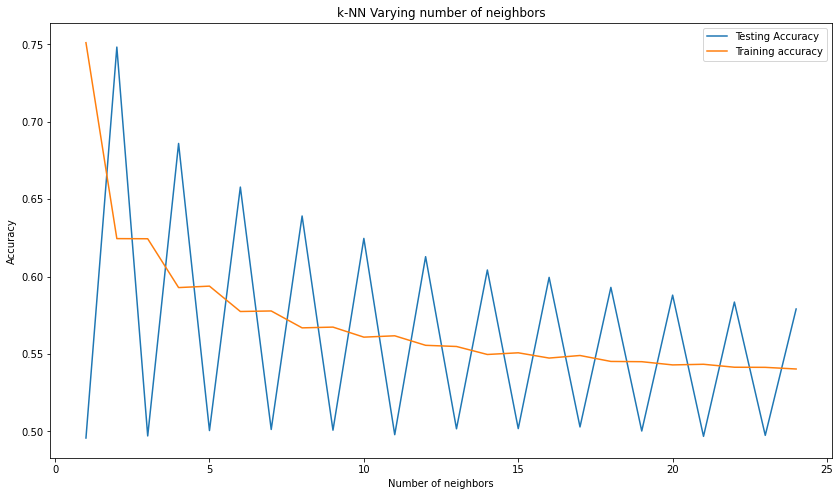

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#identify best value for n_neighbours
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]

In [ ]:
#print best value for n_neighbours
print(x[0])

2


In [ ]:
#k_nearest_neighbours_classification
knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train_ros,Y_train_ros.ravel())

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=2)

In [ ]:
#predicting labels for testing set
knn_predicted_test_labels=knn.predict(X_test)

Text(0.5, 1.0, ' Number of Blobs')

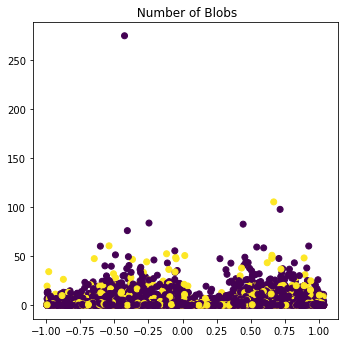

In [ ]:
from pylab import rcParams
plt.figure(figsize=(12, 12))
rcParams['figure.figsize'] = 14, 8
plt.subplot(222)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=knn_predicted_test_labels)
plt.title(" Number of Blobs")

In [ ]:
#scoring KNN
knn_accuracy_score  = accuracy_score(Y_test,knn_predicted_test_labels)
knn_precison_score  = precision_score(Y_test,knn_predicted_test_labels)
knn_recall_score    = recall_score(Y_test,knn_predicted_test_labels)
knn_f1_score        = f1_score(Y_test,knn_predicted_test_labels)
knn_MCC             = matthews_corrcoef(Y_test,knn_predicted_test_labels)

In [ ]:
#print KNN score
print("")
print("K-Nearest Neighbours")
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)
print("MCC -->",knn_MCC)
print(classification_report(Y_test,knn_predicted_test_labels))


K-Nearest Neighbours
Scores
Accuracy --> 0.7482517482517482
Precison --> 0.0011652295502213937
Recall --> 0.23809523809523808
F1 --> 0.002319109461966605
MCC --> -0.0010523033031453436
              precision    recall  f1-score   support

           0       1.00      0.75      0.86     34135
           1       0.00      0.24      0.00        42

    accuracy                           0.75     34177
   macro avg       0.50      0.49      0.43     34177
weighted avg       1.00      0.75      0.85     34177



Random Forrest

In [ ]:
#create random forrest classifier
rf = RandomForestClassifier()

In [ ]:
#create parameters for testing
rf_params = {'n_estimators': [100,200,500],
            'max_features': [3,5,7],
            'min_samples_split':[5,10,20]}

In [ ]:
#use grid search cv to find best parameters
rf_cv_model = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1, verbose=1).fit(X_train_ros, Y_train_ros)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
rf_cv_model

In [ ]:
#find best parameters for best model
best_params = rf_cv_model.best_params_
print(best_params)

{'max_features': 3, 'min_samples_split': 20, 'n_estimators': 100}


In [ ]:
#fit the model
rf = RandomForestClassifier(max_features=3, min_samples_split=20, n_estimators=100).fit(X_train_ros, Y_train_ros)

In [ ]:
#create the predicitons from the model
y_pred_rf = rf.predict(X_test)

In [ ]:
#get the accuracy score for the model
accuracy_score(Y_test, y_pred_rf)

0.5015068613394973

In [ ]:
#get cross validation score for the model
cross_val_score(rf, X_test, Y_test, cv=21).mean()

0.9992392655269117

In [ ]:
rf_accuracy_score  = accuracy_score(Y_test,y_pred_rf)
rf_precison_score  = precision_score(Y_test,y_pred_rf)
rf_recall_score    = recall_score(Y_test,y_pred_rf)
rf_f1_score        = f1_score(Y_test,y_pred_rf)
rf_MCC             = matthews_corrcoef(Y_test,y_pred_rf)

In [ ]:
print("")
print("Random Forest")
print("Scores")
print("Accuracy -->",rf_accuracy_score)
print("Precison -->",rf_precison_score)
print("Recall -->",rf_recall_score)
print("F1 -->",rf_f1_score)
print("MCC -->",rf_MCC)
print(classification_report(Y_test,y_pred_rf))


Random Forest
Scores
Accuracy --> 0.5015068613394973
Precison --> 0.0018784854710889346
Recall --> 0.48484848484848486
F1 --> 0.00374247120051459
MCC --> -0.0011952335891587784
              precision    recall  f1-score   support

           0       1.00      0.50      0.67     34111
           1       0.00      0.48      0.00        66

    accuracy                           0.50     34177
   macro avg       0.50      0.49      0.34     34177
weighted avg       1.00      0.50      0.67     34177



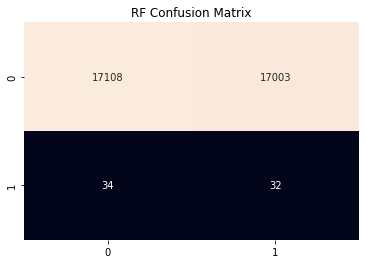

In [ ]:
#plot a confusion matrix for the model
cm = confusion_matrix(Y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('RF Confusion Matrix')
plt.savefig('rf_con_mat')
plt.show()

Decision Tree

In [ ]:
#Decision Tree Classifier with no parameters
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train_ros, Y_train_ros)
predicted=classifier.predict(X_test)
print("\n Predicted value:\n",predicted)


 Predicted value:
 [1 1 1 ... 0 1 1]


In [ ]:
#accuracy score no tuning
from sklearn import metrics
DecisionTree= metrics.accuracy_score(Y_test, predicted) * 100
print("\n The Accuracy Score Using Algorithm Decision Tree Classifier: ", DecisionTree)


 The Accuracy Score Using Algorithm Decision Tree Classifier:  49.5099043216198


In [ ]:
#Precision no tuning
print('Precision')
# use TP/(TP+FP) where (TP=True Positif, TN=True Negative,FP = False Positive, FN = False Negative)
precision=precision_score(Y_test, predicted, pos_label=1)*100
print('\n Score Precision :\n',precision )

Precision

 Score Precision :
 0.19123783031988875


In [ ]:
#Recall no tuning
# Recall = TP / (TP + FN)
print("Recall")
recall=recall_score(Y_test, predicted, pos_label=1)*100
print("\n Recall Score :\n", recall)

Recall

 Recall Score :
 50.0


In [ ]:
#F1-Score no tuning
print('F1-Score')
fscore=f1_score(Y_test, predicted, pos_label=1)*100
print("\n F1 Score :\n", fscore)

F1-Score

 F1 Score :
 0.38101835815725665


In [ ]:
#parameter dictionary
param_dict = {
    'criterion':['gini', 'entropy'],
    'max_depth':range(1,25),
    'min_samples_split':range(1,25),
    'min_samples_leaf':range(1,25)
}

In [ ]:
#complete gridsearch cv
grid = GridSearchCV(classifier,
                    param_grid=param_dict,
                    cv=5,
                    verbose=1,
                    n_jobs=-1)
grid.fit(X_train_ros, Y_train_ros)

In [ ]:
#get best parameters
grid.best_params_

In [ ]:
best_classifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=17, min_samples_split=5)

In [ ]:
best_classifier.fit(X_train_ros, Y_train_ros)
predicted= best_classifier.predict(X_test)
print("\n Predicted value:\n",predicted)


 Predicted value:
 [1 0 1 ... 1 0 1]


In [ ]:
from sklearn import metrics
DecisionTree= metrics.accuracy_score(Y_test, predicted) * 100
print("\n The Accuracy Score Using Algorithm Decision Tree Classifier: ", DecisionTree)


 The Accuracy Score Using Algorithm Decision Tree Classifier:  55.05456886210024


In [ ]:
dc_accuracy_score  = accuracy_score(Y_test,predicted)
dc_precison_score  = precision_score(Y_test,predicted)
dc_recall_score    = recall_score(Y_test,predicted)
dc_f1_score        = f1_score(Y_test,predicted)
dc_MCC             = matthews_corrcoef(Y_test,predicted)

In [ ]:
print("")
print("Decsion Tree")
print("Scores")
print("Accuracy -->",dc_accuracy_score)
print("Precison -->",dc_precison_score)
print("Recall -->",dc_recall_score)
print("F1 -->",dc_f1_score)
print("MCC -->",dc_MCC)
print(classification_report(Y_test,predicted))


Decsion Tree
Scores
Accuracy --> 0.5505456886210024
Precison --> 0.0008485085829906664
Recall --> 0.19696969696969696
F1 --> 0.0016897380905959577
MCC --> -0.022228360472292607
              precision    recall  f1-score   support

           0       1.00      0.55      0.71     34111
           1       0.00      0.20      0.00        66

    accuracy                           0.55     34177
   macro avg       0.50      0.37      0.36     34177
weighted avg       1.00      0.55      0.71     34177

